In [1]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, validation_curve
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV, ElasticNet, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import make_pipeline
df = pd.read_csv('ml.csv', sep=';')

# Define columns to be log-transformed
columns_to_log_transform = ['price']

# Apply log transformation to selected columns
df[columns_to_log_transform] = np.log(df[columns_to_log_transform])

y = df['price']
X = df.drop(columns=['price','Unnamed: 0','days_active','grundskyldspromille'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X.columns)

Index(['area', 'land_area', 'rooms', 'ejerudg', 'distance_to_city',
       'residents', 'municipal_tax_rate', 'age', 'type_Villa', 'energy_B',
       'energy_C', 'energy_D', 'energy_E', 'energy_F', 'energy_G',
       'close_Aarhus', 'close_Copenhagen', 'close_Odense'],
      dtype='object')


# Lasso 1. Degree

In [2]:
results_lasso = []
degree=1
# Creating polynomial features
alphas_to_test = np.logspace(-8, 8, 20)
polynomial_features = PolynomialFeatures(degree=degree, include_bias=True)
X_poly_train = polynomial_features.fit_transform(X_train)
X_poly_test = polynomial_features.transform(X_test)

# Standardizing the data
scaler = StandardScaler()
X_poly_train = scaler.fit_transform(X_poly_train)
X_poly_test = scaler.transform(X_poly_test)

# Training Lasso regression with max_iter=5000
model = LassoCV(alphas=alphas_to_test, max_iter=5000, cv=20)
#model = Lasso(max_iter=5000, cv=5)
model.fit(X_poly_train, y_train)

# Predictions
y_pred = model.predict(X_poly_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

results_lasso.append([degree, mse, rmse, mae, r2, model.alpha_])  # Report alpha

In [3]:
d = {'test 1':y_test, 'prediction 1':y_pred}
df = pd.DataFrame(d)
df

,test 1,prediction 1
1448,15.318476,15.137087
11832,15.463207,15.859887
10949,14.912455,14.598516
15609,15.623799,15.258668
15723,15.295978,15.115602
...,...,...
4634,16.906553,17.152411
7782,15.122491,14.605883
4475,14.148405,14.290886
24437,16.001000,15.585506


Text(33.25000000000001, 0.5, 'Predicted Values')

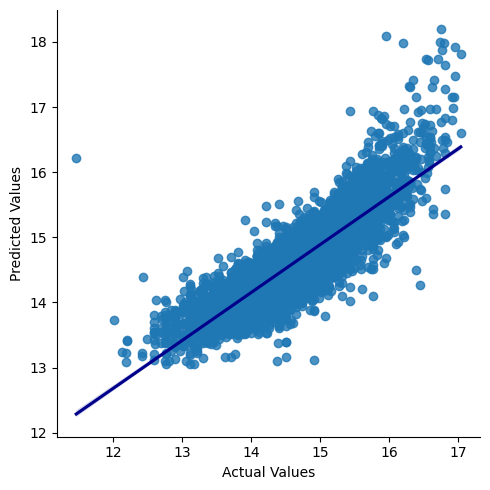

In [4]:
# Plot actual vs predicted values
# plt.scatter(y_test, y_pred, label=f"Polynomial {degree}")

# plt.xlabel('Actual Values')
# plt.ylabel('Predicted Values')
# plt.title('Actual vs Predicted values')
# plt.legend()

# plt.show()

sns.lmplot(data=df,x='test 1', y='prediction 1',line_kws={'color': 'darkblue'})
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

   Polynomial Degree       MSE      RMSE       MAE        R2         Alpha
0                  1  0.157375  0.396705  0.301531  0.747402  1.000000e-08


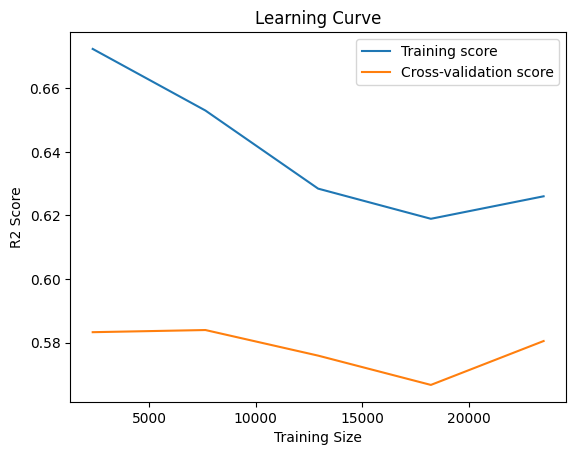

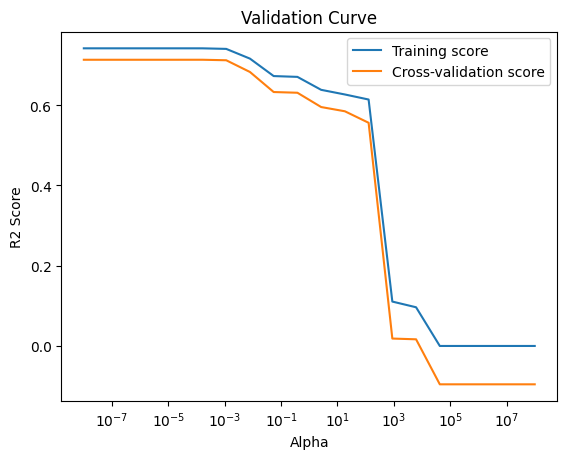

In [5]:
# Tabulate results
results_df = pd.DataFrame(results_lasso, columns=['Polynomial Degree', 'MSE', 'RMSE', 'MAE', 'R2', 'Alpha'])
print(results_df)

# Plot learning curve with n_jobs=-1
train_sizes, train_scores, test_scores = learning_curve(LassoCV(max_iter=10000), X, y, cv=10)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('R2 Score')
plt.legend()
plt.show()

# Plot validation curve with n_jobs=-1
param_range = np.logspace(-8, 8, 20)
train_scores, test_scores = validation_curve(Lasso(max_iter=10000), X, y, param_name="alpha", param_range=param_range, cv=10)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
plt.plot(param_range, train_mean, label='Training score')
plt.plot(param_range, test_mean, label='Cross-validation score')
plt.title('Validation Curve')
plt.xlabel('Alpha')
plt.ylabel('R2 Score')
plt.xscale('log')
plt.legend()
plt.show()



# Lasso 2. Degree

In [6]:
results_lasso = []
degree=2
# Creating polynomial features
alphas_to_test = np.logspace(-8, 8, 20)
polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
X_poly_train = polynomial_features.fit_transform(X_train)
X_poly_test = polynomial_features.transform(X_test)

# Standardizing the data
scaler = StandardScaler()
X_poly_train = scaler.fit_transform(X_poly_train)
X_poly_test = scaler.transform(X_poly_test)

# Training Lasso regression with max_iter=5000
model = LassoCV(alphas=alphas_to_test, max_iter=10000, cv=10, n_jobs=-1)
#model = Lasso(max_iter=5000, cv=5)
model.fit(X_poly_train, y_train)

# Predictions
y_pred = model.predict(X_poly_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

results_lasso.append([degree, mse, rmse, mae, r2, model.alpha_])  # Report alpha



c:\Users\Augus\code\Data\venv_jupyter\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37.45815929803871, tolerance: 1.1108326045947923
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\Augus\code\Data\venv_jupyter\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37.65632366487762, tolerance: 1.1138520812484303
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\Augus\code\Data\venv_jupyter\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38.37414293316124, tolerance: 1.1000997384230489
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\Augus\code\Data\venv_jupyter\lib\site-packa

In [7]:
e = {'test 2':y_test, 'prediction 2':y_pred}
df = df.assign(**e)
df

,test 1,prediction 1,test 2,prediction 2
1448,15.318476,15.137087,15.318476,15.210515
11832,15.463207,15.859887,15.463207,15.655138
10949,14.912455,14.598516,14.912455,14.756535
15609,15.623799,15.258668,15.623799,15.780895
15723,15.295978,15.115602,15.295978,15.005706
...,...,...,...,...
4634,16.906553,17.152411,16.906553,17.259631
7782,15.122491,14.605883,15.122491,14.696788
4475,14.148405,14.290886,14.148405,14.411079
24437,16.001000,15.585506,16.001000,15.836447


Text(33.25000000000001, 0.5, 'Predicted Values')

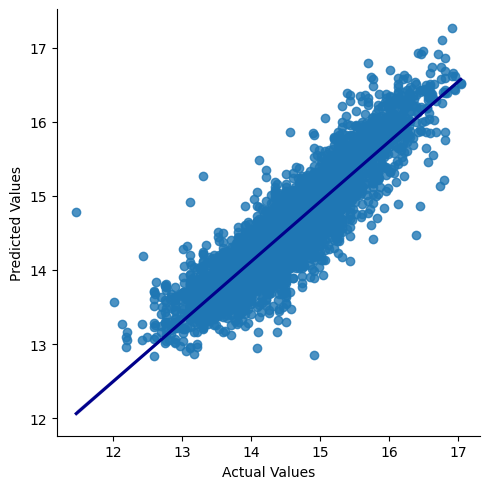

In [8]:
# Plot actual vs predicted values
# plt.scatter(y_test, y_pred, label=f"Polynomial {degree}")

# plt.xlabel('Actual Values')
# plt.ylabel('Predicted Values')
# plt.title('Actual vs Predicted values')
# plt.legend()

# plt.show()

sns.lmplot(data=df,x='test 2', y='prediction 2',line_kws={'color': 'darkblue'})
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

   Polynomial Degree       MSE      RMSE       MAE       R2         Alpha
0                  2  0.113715  0.337216  0.253524  0.81748  1.000000e-08


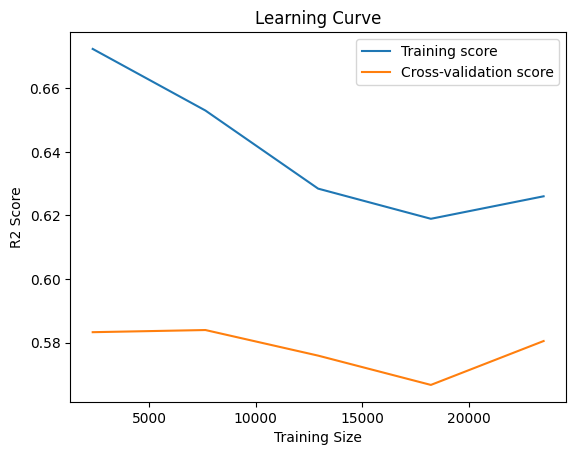

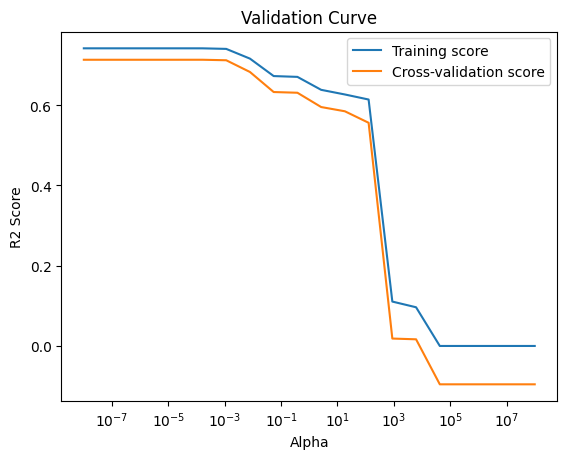

In [9]:
# Tabulate results
results_df = pd.DataFrame(results_lasso, columns=['Polynomial Degree', 'MSE', 'RMSE', 'MAE', 'R2', 'Alpha'])
print(results_df)

# Plot learning curve with n_jobs=-1
train_sizes, train_scores, test_scores = learning_curve(LassoCV(max_iter=10000), X, y, cv=10, n_jobs=-1)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('R2 Score')
plt.legend()
plt.show()

# Plot validation curve with n_jobs=-1
param_range = np.logspace(-8, 8, 20)
train_scores, test_scores = validation_curve(Lasso(max_iter=10000), X, y, param_name="alpha", param_range=param_range, cv=10, n_jobs=-1)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
plt.plot(param_range, train_mean, label='Training score')
plt.plot(param_range, test_mean, label='Cross-validation score')
plt.title('Validation Curve')
plt.xlabel('Alpha')
plt.ylabel('R2 Score')
plt.xscale('log')
plt.legend()
plt.show()



# Lasso 3. Degree

In [10]:

degree=3
# Creating polynomial features
alphas_to_test = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
X_poly_train = polynomial_features.fit_transform(X_train)
X_poly_test = polynomial_features.transform(X_test)

# Standardizing the data
scaler = StandardScaler()
X_poly_train = scaler.fit_transform(X_poly_train)
X_poly_test = scaler.transform(X_poly_test)

# Training Lasso regression with max_iter=5000
model = LassoCV(alphas=alphas_to_test, max_iter=10000, cv=10, n_jobs=-1)
#model = Lasso(max_iter=5000, cv=5)
model.fit(X_poly_train, y_train)

# Predictions
y_pred = model.predict(X_poly_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

results_lasso.append([degree, mse, rmse, mae, r2, model.alpha_])  # Report alpha



In [11]:
f = {'test 3':y_test, 'prediction 3':y_pred}
df = df.assign(**f)
df

,test 1,prediction 1,test 2,prediction 2,test 3,prediction 3
1448,15.318476,15.137087,15.318476,15.210515,15.318476,15.337686
11832,15.463207,15.859887,15.463207,15.655138,15.463207,15.938050
10949,14.912455,14.598516,14.912455,14.756535,14.912455,14.613270
15609,15.623799,15.258668,15.623799,15.780895,15.623799,15.718793
15723,15.295978,15.115602,15.295978,15.005706,15.295978,15.043638
...,...,...,...,...,...,...
4634,16.906553,17.152411,16.906553,17.259631,16.906553,17.061386
7782,15.122491,14.605883,15.122491,14.696788,15.122491,14.749090
4475,14.148405,14.290886,14.148405,14.411079,14.148405,14.428298
24437,16.001000,15.585506,16.001000,15.836447,16.001000,15.770832


Text(33.25000000000001, 0.5, 'Predicted Values')

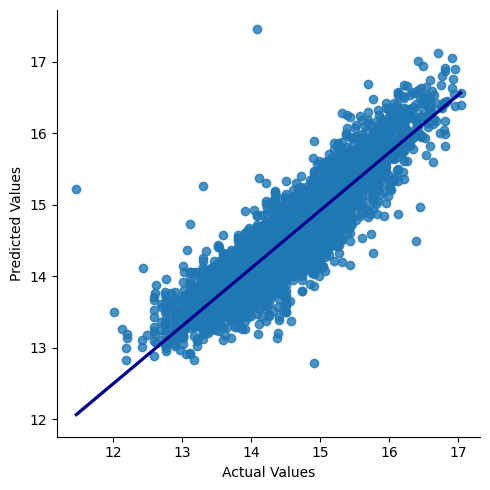

In [12]:
# Plot actual vs predicted values
# plt.scatter(y_test, y_pred, label=f"Polynomial {degree}")

# plt.xlabel('Actual Values')
# plt.ylabel('Predicted Values')
# plt.title('Actual vs Predicted values')
# plt.legend()

# plt.show()

sns.lmplot(data=df,x='test 3', y='prediction 3',line_kws={'color': 'darkblue'})
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

   Polynomial Degree      MSE      RMSE      MAE       R2  Alpha
0                  3  0.11068  0.332687  0.24688  0.82235  0.001


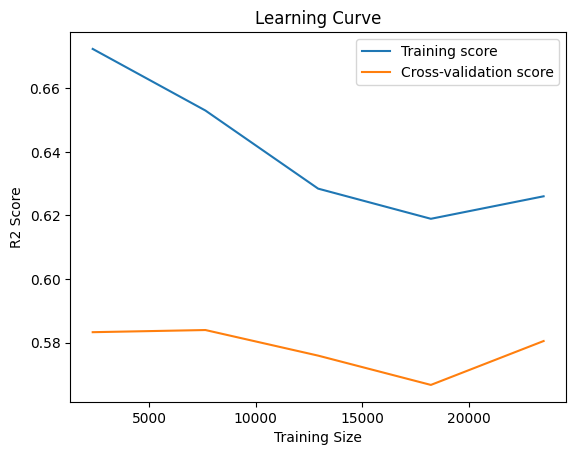

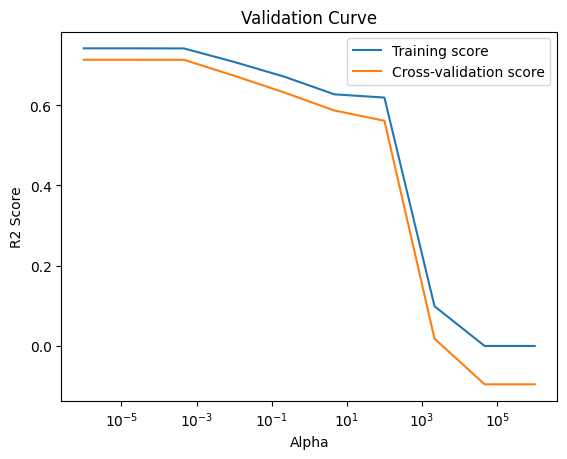

In [13]:
# Tabulate results
results_df = pd.DataFrame(results_lasso, columns=['Polynomial Degree', 'MSE', 'RMSE', 'MAE', 'R2', 'Alpha'])
print(results_df)

# Plot learning curve with n_jobs=-1
train_sizes, train_scores, test_scores = learning_curve(LassoCV(max_iter=10000), X, y, cv=10, n_jobs=-1)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('R2 Score')
plt.legend()
plt.show()

# Plot validation curve with n_jobs=-1
param_range = np.logspace(-6, 6, 10)
train_scores, test_scores = validation_curve(Lasso(max_iter=10000), X, y, param_name="alpha", param_range=param_range, cv=10, n_jobs=-1)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
plt.plot(param_range, train_mean, label='Training score')
plt.plot(param_range, test_mean, label='Cross-validation score')
plt.title('Validation Curve')
plt.xlabel('Alpha')
plt.ylabel('R2 Score')
plt.xscale('log')
plt.legend()
plt.show()



### Plots

# Ridge

In [14]:

degree=2
# Creating polynomial features
alphas_to_test = np.logspace(-8, 8, 20)
polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
X_poly_train = polynomial_features.fit_transform(X_train)
X_poly_test = polynomial_features.transform(X_test)

# Standardizing the data
scaler = StandardScaler()
X_poly_train = scaler.fit_transform(X_poly_train)
X_poly_test = scaler.transform(X_poly_test)

# Training Lasso regression with max_iter=5000
model = RidgeCV(alphas=alphas_to_test, cv=10)
#model = Lasso(max_iter=5000, cv=5)
model.fit(X_poly_train, y_train)

# Predictions
y_pred = model.predict(X_poly_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

results_ridge.append([degree, mse, rmse, mae, r2, model.alpha_])  # Report alpha





In [15]:
e = {'test 2':y_test, 'prediction 2':y_pred}
df = df.assign(**e)
df


,test 1,prediction 1,test 2,prediction 2,test 3,prediction 3
1448,15.318476,15.137087,15.318476,15.197375,15.318476,15.337686
11832,15.463207,15.859887,15.463207,15.621773,15.463207,15.938050
10949,14.912455,14.598516,14.912455,14.753670,14.912455,14.613270
15609,15.623799,15.258668,15.623799,15.782035,15.623799,15.718793
15723,15.295978,15.115602,15.295978,14.968979,15.295978,15.043638
...,...,...,...,...,...,...
4634,16.906553,17.152411,16.906553,17.250105,16.906553,17.061386
7782,15.122491,14.605883,15.122491,14.711984,15.122491,14.749090
4475,14.148405,14.290886,14.148405,14.428207,14.148405,14.428298
24437,16.001000,15.585506,16.001000,15.872942,16.001000,15.770832


### Plots

Text(33.25000000000001, 0.5, 'Predicted Values')

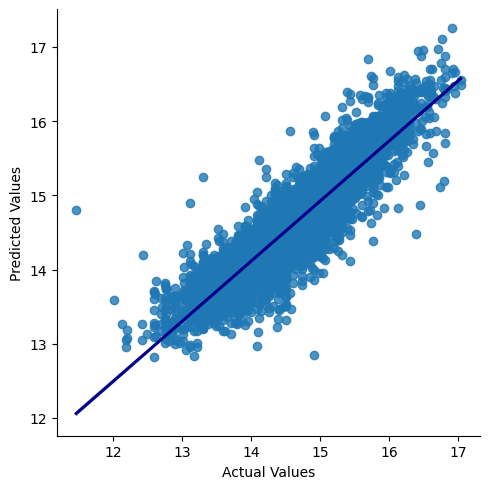

In [16]:
sns.lmplot(data=df,x='test 2', y='prediction 2',line_kws={'color': 'darkblue'})
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

   Polynomial Degree       MSE      RMSE       MAE        R2     Alpha
0                  2  0.113285  0.336578  0.252748  0.818169  0.001129


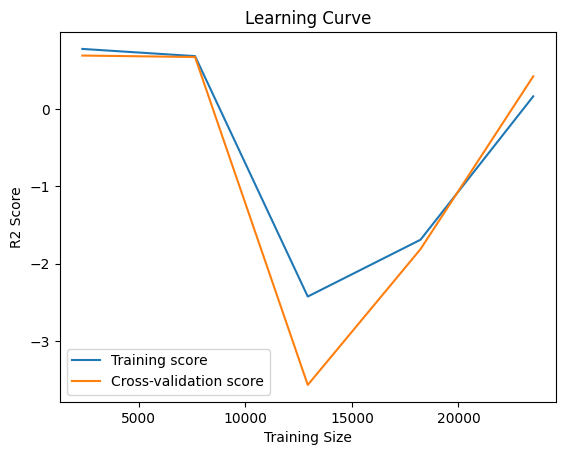

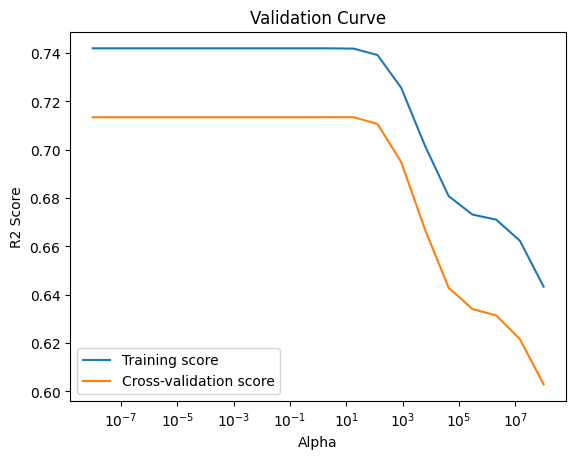

In [17]:
# Tabulate results
results_df = pd.DataFrame(results_ridge, columns=['Polynomial Degree', 'MSE', 'RMSE', 'MAE', 'R2', 'Alpha'])
print(results_df)

# Plot learning curve with n_jobs=-1
train_sizes, train_scores, test_scores = learning_curve(RidgeCV(), X, y, cv=10)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('R2 Score')
plt.legend()
plt.show()

# Plot validation curve with n_jobs=-1
param_range = np.logspace(-8, 8, 20)
train_scores, test_scores = validation_curve(Ridge(), X, y, param_name="alpha", param_range=param_range, cv=10)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
plt.plot(param_range, train_mean, label='Training score')
plt.plot(param_range, test_mean, label='Cross-validation score')
plt.title('Validation Curve')
plt.xlabel('Alpha')
plt.ylabel('R2 Score')
plt.xscale('log')
plt.legend()
plt.show()


# Elastic Net


### Plots